# April ??th, 2022 (register RABIES)

**Motivation**: ?? <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from numpy.ma import masked_where as mwh
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
fig_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = 'Documents/workspaces/lfr/binary_overlapping'
lfr_dir = pjoin(os.environ['HOME'], lfr_dir)

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.fourier import *
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# set style & no interpolalation
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice((128), full_load=True, load_parcel=True, load_allen=True)
mice.setup_anat_data()

In [3]:
from register.register import *
reg = Register(mice)

In [4]:
kwargs = {
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.28, 0.3, 0.32, 0.34, 0.35, 0.37, 0.38, 0.39, 0.40, 0.42, 0.43, 0.45, 0.47, 0.5, 0.55],
    'syn_bins': [64, 48, 32],
    'aff_bins': [13, 20, 25, 32],
    'aff_rates': [0.2, 0.4, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10,
}
kwargs

{
    'types': ['SyN', 'ElasticSyN'],
    'grads': [
        0.28,
        0.3,
        0.32,
        0.34,
        0.35,
        0.37,
        0.38,
        0.39,
        0.4,
        0.42,
        0.43,
        0.45,
        0.47,
        0.5,
        0.55
    ],
    'syn_bins': [64, 48, 32],
    'aff_bins': [13, 20, 25, 32],
    'aff_rates': [0.2, 0.4, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10
}

In [5]:
kwargs = {
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.28, 0.3],
    'syn_bins': [64, 48],
    'aff_bins': [13, 20],
    'aff_rates': [0.2, 0.4],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 2,
}
kwargs

{
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.28, 0.3],
    'syn_bins': [64, 48],
    'aff_bins': [13, 20],
    'aff_rates': [0.2, 0.4],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 2
}

In [6]:
reg.set_mode('bold')
reg.mi_base = None

In [7]:
key = 'sub-SLC09_ses-2'
indiv = mice.T1w[key].load_ants()
indiv *= mice.mask3d[key].load_ants()
indiv = reg._prepare(indiv)

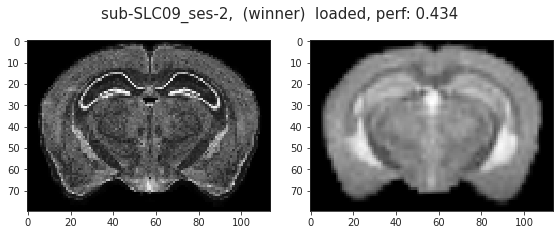

sub-SLC09_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    0  SyN   0.3       48       13       0.4       mi 0.519537
    0  SyN   0.3       48       13       0.4  ovp_MOp 0.973451
    0  SyN   0.3       48       13       0.4  sym_MOp 0.992945
    0  SyN   0.3       48       13       0.4  ovp_MOs 0.988341
    0  SyN   0.3       48       13       0.4  sym_MOs 0.956140
    0  SyN   0.3       48       13       0.4   ovp_SS 0.990991
    0  SyN   0.3       48       13       0.4   sym_SS 0.982143
    0  SyN   0.3       48       13       0.4 ovp_VISC 0.958848
    0  SyN   0.3       48       13       0.4 sym_VISC 0.991803
    0  SyN   0.3       48       13       0.4  ovp_VIS 0.997533
    0  SyN   0.3       48       13       0.4  sym_VIS 0.986928
    0  SyN   0.3       48       13       0.4   ovp_AI 0.905459
    0  SyN   0.3       48       13       0.4   sym_AI 0.920716
    0  SyN   0.3       48       13       0.4 ovp_PTLp 1.000000
    0  SyN   0.3       48       13       0.4 sym_PTLp 0.975207
    0  SyN   0.3       48       13       0.4  ovp_TEa 0.975089
    0  SyN   0.3       48       13       0.4  sym_TEa 0.885906
    0  SyN   0.3       48       13       0.4  ovp_CA1 1.000000
    0  SyN   0.3       48       13       0.4  sym_CA1 0.984513
    0  SyN   0.3       48       13       0.4  ovp_CLA 1.000000
    0  SyN   0.3       48       13       0.4  sym_CLA 0.777778
    0  SyN   0.3       48       13       0.4 ovp_STRd 1.000000
    0  SyN   0.3       48       13       0.4 sym_STRd 0.994016
    0  SyN   0.3       48       13       0.4  ovp_iso 0.981141
    0  SyN   0.3       48       13       0.4  sym_iso 0.952654
    0  SyN   0.3       48       13       0.4      sym 0.976425
    0  SyN   0.3       48       13       0.4      ovp 0.986212

CPU times: user 2h 22min 33s, sys: 3min 58s, total: 2h 26min 31s
Wall time: 10min 58s


In [8]:
%%time

results = reg.fit_register(
    name=key,
    moving=indiv,
    fixed=reg.nissl,
    save_results=True,
    **kwargs
)

In [9]:
results

{
    'df':       seed        type  grad  syn_bin  aff_bin  aff_rate    metric     score
0        0         SyN  0.28       64       13       0.2        mi  0.517675
1        0         SyN  0.28       64       13       0.2   ovp_MOp  0.969109
2        0         SyN  0.28       64       13       0.2   sym_MOp  0.984238
3        0         SyN  0.28       64       13       0.2   ovp_MOs  0.984509
4        0         SyN  0.28       64       13       0.2   sym_MOs  0.972835
...    ...         ...   ...      ...      ...       ...       ...       ...
1723     1  ElasticSyN  0.30       48       20       0.4  sym_STRd  0.965063
1724     1  ElasticSyN  0.30       48       20       0.4   ovp_iso  0.983113
1725     1  ElasticSyN  0.30       48       20       0.4   sym_iso  0.976729
1726     1  ElasticSyN  0.30       48       20       0.4       sym  0.945688
1727     1  ElasticSyN  0.30       48       20       0.4       ovp  0.989185

[1728 rows x 8 columns],
    'tx': {
        'warpedmovout': ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (100.0, 100.0, 100.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
        'warpedfixout': ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (100.0, 100.0, 100.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
        'fwdtransforms': [
            '/tmp/tmpcqkem8uw1Warp.nii.gz',
            '/tmp/tmpcqkem8uw0GenericAffine.mat'
        ],
        'invtransforms': [
            '/tmp/tmpcqkem8uw0GenericAffine.mat',
            '/tmp/tmpcqkem8uw1InverseWarp.nii.gz'
        ]
    },
    'tx_aff': ANTsTransform
         Type       : AffineTransform
         Dimension  : 3
         Precision  : float
,
    'tx_id': 'seed-0_type-SyN_grad-0.30_synbin-48_affbin-13_affrate-0.4',
    'moving_aff': ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (100.0, 100.0, 100.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'perf': 0.9764254270368588
}

In [72]:
save_obj(results['df'], f"fit-RABIES_{key}_{now()}", tmp_dir, 'df')

[PROGRESS] 'fit_sub-SLC09_ses-2_(2022_01_27).df' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp

'/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/fit_sub-SLC09_ses-2_(2022_01_27).df'

### --- continue from here

In [73]:
df = results['df'].copy()

params = {
    'seed': 5,
    'type': 'SyN', # 'ElasticSyN'
    'grad': 0.4,
    'syn_bin': 32,
    'aff_bin': 13,
    'aff_rate': 0.2,
}
cond = functools.reduce(
    lambda x, y: x & y,
    [df[k] == v for k, v in params.items()],
)

df_sub_main = df.loc[cond]
df_sub_main

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
118341,5,SyN,0.4,32,13,0.2,mi,0.519319
118342,5,SyN,0.4,32,13,0.2,ovp_MOp,0.984155
118343,5,SyN,0.4,32,13,0.2,sym_MOp,0.968804
118344,5,SyN,0.4,32,13,0.2,ovp_MOs,0.989455
118345,5,SyN,0.4,32,13,0.2,sym_MOs,0.962069
118346,5,SyN,0.4,32,13,0.2,ovp_SS,0.996241
118347,5,SyN,0.4,32,13,0.2,sym_SS,0.990789
118348,5,SyN,0.4,32,13,0.2,ovp_VISC,0.986607
118349,5,SyN,0.4,32,13,0.2,sym_VISC,0.982301
118350,5,SyN,0.4,32,13,0.2,ovp_VIS,0.995912


In [74]:
results['perf']

0.9848013027215972

In [75]:
_df = df.loc[df['metric'] == 'sym']
_df.iloc[[_df['score'].argmax()]]

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
142369,6,ElasticSyN,0.15,64,32,0.6,sym,0.988522


In [76]:
params = dict(_df.iloc[_df['score'].argmax()])
params.pop('metric')
params.pop('score')

cond = functools.reduce(
    lambda x, y: x & y,
    [df[k] == v for k, v in params.items()],
)
df_sub = df.loc[cond]
df_sub

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
142344,6,ElasticSyN,0.15,64,32,0.6,mi,0.510888
142345,6,ElasticSyN,0.15,64,32,0.6,ovp_MOp,0.984848
142346,6,ElasticSyN,0.15,64,32,0.6,sym_MOp,0.996639
142347,6,ElasticSyN,0.15,64,32,0.6,ovp_MOs,0.988870
142348,6,ElasticSyN,0.15,64,32,0.6,sym_MOs,0.983022
142349,6,ElasticSyN,0.15,64,32,0.6,ovp_SS,0.997777
142350,6,ElasticSyN,0.15,64,32,0.6,sym_SS,0.997225
142351,6,ElasticSyN,0.15,64,32,0.6,ovp_VISC,0.986784
142352,6,ElasticSyN,0.15,64,32,0.6,sym_VISC,0.956897
142353,6,ElasticSyN,0.15,64,32,0.6,ovp_VIS,0.999216


[<matplotlib.lines.Line2D object at 0x7f70083331c0>]

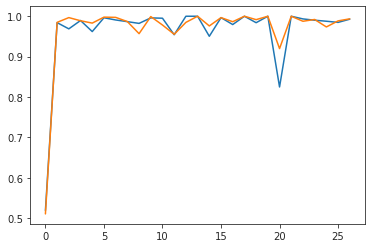

In [77]:
plt.plot(df_sub_main['score'].values)
plt.plot(df_sub['score'].values)

<AxesSubplot:xlabel='score', ylabel='Count'>

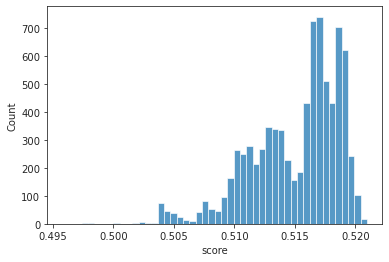

In [78]:
sns.histplot(df.loc[df['metric'] == 'mi', 'score'])

<AxesSubplot:xlabel='score', ylabel='Count'>

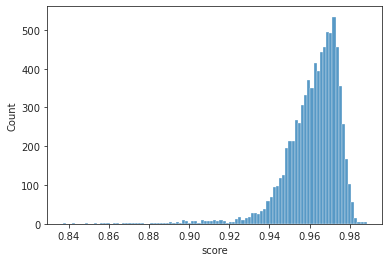

In [79]:
sns.histplot(df.loc[df['metric'] == 'sym', 'score'])

<AxesSubplot:>

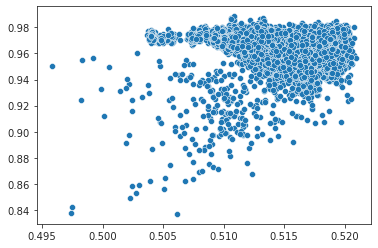

In [80]:
sns.scatterplot(
    x=df.loc[df['metric'] == 'mi', 'score'].values,
    y=df.loc[df['metric'] == 'sym', 'score'].values,
)

## Kaba continues

In [5]:
self = reg

In [6]:
tx, tx_aff = self.load_tx(self.in_house_name)

In [7]:
tx

[
    '/home/hadi/Documents/Ca-fMRI/processed/transforms/Symmetric_N162_space-CCF3d_ants-inv.mat',
    '/home/hadi/Documents/Ca-fMRI/processed/transforms/Symmetric_N162_space-CCF3d_ants-inv.nii.gz'
]

In [8]:
tx_aff

ANTsTransform
         Type       : AffineTransform
         Dimension  : 3
         Precision  : float

In [9]:
affined = tx_aff.apply_to_image(
    image=self.in_house,
    reference=self.nissl,
    interpolation='linear',
)
_ = self._apply_tx_obj2lps(
    name=self.in_house_name,
    moving=affined,
    moving_orig=self.in_house,
    tx_aff=tx_aff,
    tx=tx,
    use_mm=True,
    save_results=True,
)